<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Eyve_Geo_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
# TODO
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')


In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [6]:
income.shape, lifespan.shape, population.shape, entities.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33))

In [0]:
entities.head()
cols=['country', 'landlocked', 'name', 'main_religion_2008', 'world_6region']
entities=entities[cols]

In [0]:
income.head()
income=income.rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'income'})

In [0]:
merged=pd.merge(pd.merge(income, lifespan), population)
merged.head()
merged=pd.merge(merged,entities, left_on='geo', right_on='country')
merged=merged.drop('country',axis=1)

In [0]:
cols = {
    'time': 'year', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
    }
merged=merged.rename(columns=cols)

In [0]:
def landLock(item):
  if item=='landlocked':
    return True
  else:
    return False
# not actually helpful to encode them as a bool right now
#merged['landlocked']=merged['landlocked'].apply(landLock)

In [12]:
merged.isna().sum()

geo                      0
year                     0
income                   0
lifespan                 0
population               0
landlocked               0
country                  0
main_religion_2008    3723
6region                  0
dtype: int64

In [13]:
merged.dtypes

geo                    object
year                    int64
income                  int64
lifespan              float64
population              int64
landlocked             object
country                object
main_religion_2008     object
6region                object
dtype: object

In [14]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [15]:
merged.describe(exclude='number')

,geo,landlocked,country,main_religion_2008,6region
count,40437,40437,40437,36714,40437
unique,187,2,187,3,6
top,bdi,coastline,Mozambique,christian,europe_central_asia
freq,219,31630,219,24231,10778


In [0]:
now = merged[merged.year==2018]


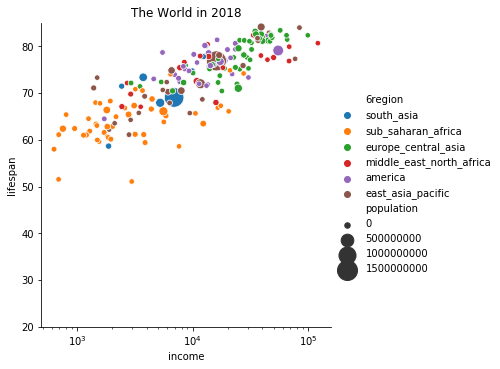

In [17]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(20,85)
plt.title("The World in 2018")
plt.show()

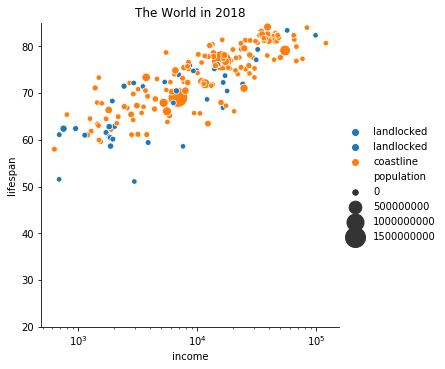

In [18]:
sns.relplot(x='income', y='lifespan', hue='landlocked', size='population', sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(20,85)
plt.title("The World in 2018")
plt.show()

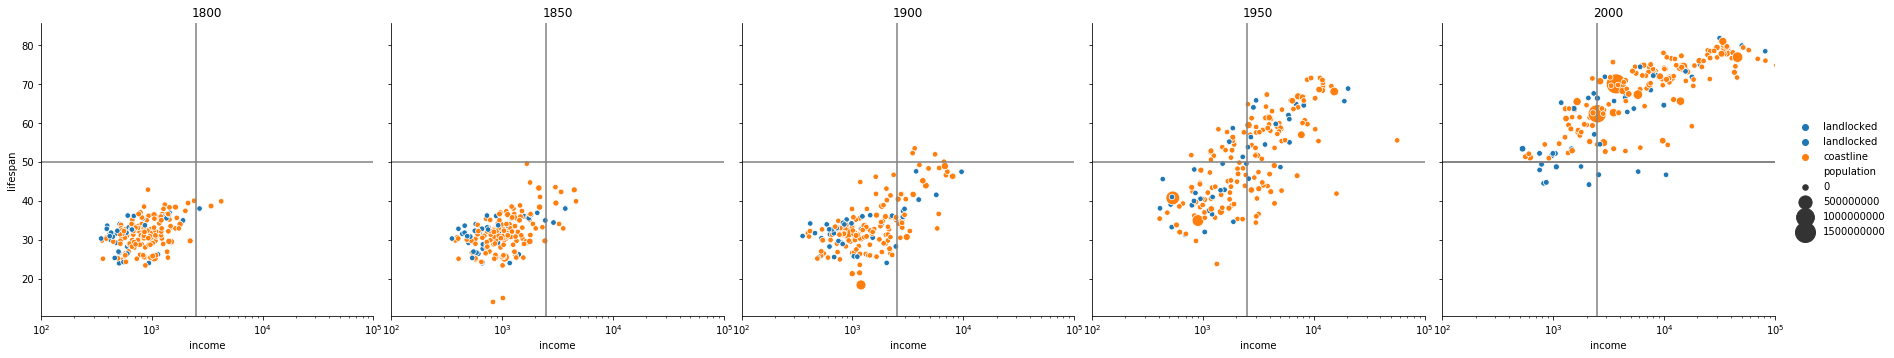

In [37]:
years=list(range(1800,2050,50))
halfCenturies=merged[merged.year.isin(years)]

fig=sns.relplot(x='income', y='lifespan', hue='landlocked', size='population',sizes=(30,400), data=halfCenturies, col='year')
ax=fig.axes[0]
for x in [0,1,2,3,4]: 
  ax[x].axhline(y=50, color='grey')
  ax[x].axvline(x=2500, color='grey')
  ax[x].set_title(str(x*50+1800))
plt.xscale('log')
plt.xlim(100,100000)
plt.axhline(y=50, color='grey')
plt.show()

The thing we are seeing here is countries moving towards longer life, approaching and passing 50 years. The dots are also colored based on whether or not the countries are landlocked. This shows that countries who are landlocked are much slower to gain in lifespan. Surprisingly they increase in income comperably with the countries who are not landlocked, passing the bar of $2500 per person


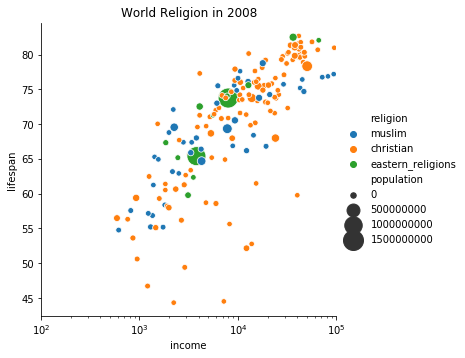

In [28]:
religion=merged[merged.year==2008]
religion=religion.rename(columns={'main_religion_2008':'religion'})


fig=sns.relplot(x='income', y='lifespan', hue='religion', size='population',sizes=(30,400), data=religion, col='year')
ax=fig.axes[0]
plt.xscale('log')
plt.xlim(100,100000)

plt.title('World Religion in 2008')


plt.show()


I feel like this graph is interesting but not particularly informative. 

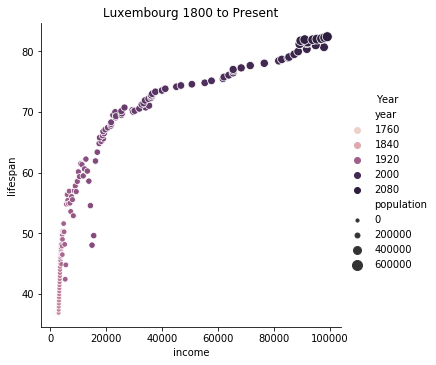

In [64]:
lux=merged[merged['country']=='Luxembourg']
ax=sns.relplot(x='income',y='lifespan',hue='year',size='population', sizes=(10,100), data=lux)
leg=ax._legend
leg.set_title('Year')

plt.title("Luxembourg 1800 to Present");
#plt.yscale('log')
#plt.xlim(2500, 100000);

I think the most interesting thing about this graph are the drops in lifespan, which if we look at a graph comparing year with lifespan directly reveals that those drops happened around the time of the world wars. Surprisingly this doesn't appear to have had to much effect on the income of the country which really starts to take off after the average lifespan is around 70

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO